# Extracting elbow angle and emg data

In [1]:
import pandas as pd
import numpy as np
import os
from signal_extraction import *

In [3]:
subject_names=os.listdir(BASE_DATA_DIR)
subject_names

['abhoy', 'alok']

In [2]:
subject_name='abhoy'
file_index=1

data=read_xsens_data(subject_name,file_index)

data

array([ 1.89721847,  1.94297329,  1.98866801, ..., -1.22832351,
       -1.084201  , -0.91481608])

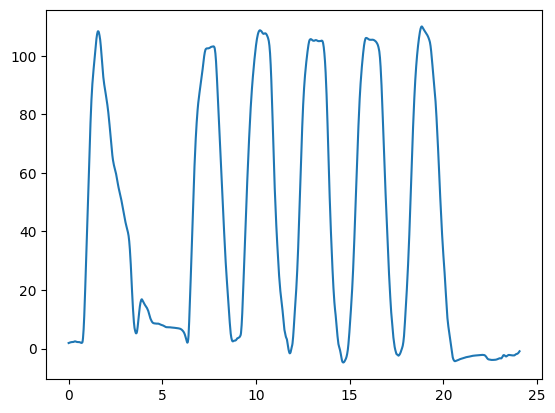

In [3]:
import matplotlib.pyplot as plt

t=np.linspace(0,(len(data)-1)/60,len(data))
plt.plot(t,data)

In [4]:
import os
import numpy as np

sampling_rate=60
for subject_name in subject_names:
    file_indices=range(0,10)
    for file_index in file_indices:
        file_folder=f'{file_index}'
        if file_index==0:
            file_folder='MVC'

        save_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/Elbow_Angle_Data/'
        os.makedirs(save_path,exist_ok=True)

        angle=read_xsens_data(subject_name, file_index)

        data_angle={'time':np.linspace(0,(len(angle)-1)/sampling_rate, len(angle)),
            'angle':angle}
        
        pd.DataFrame(data_angle).to_csv(f'{save_path}/angle.csv', index=False)

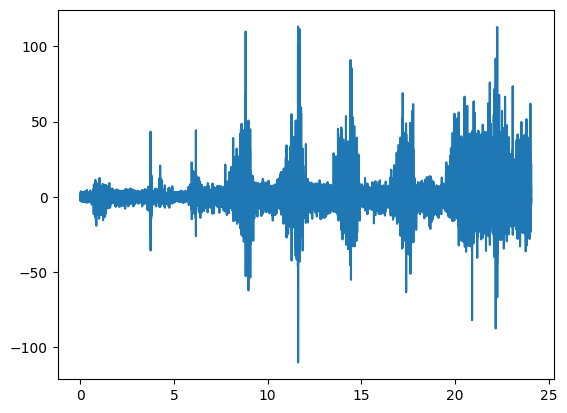

In [42]:
emg_signals=read_emg_data(subject_name, file_index)

muscle_index=1
t_emg=np.linspace(0,(len(emg_signals[muscle_index])-1)/2000,len(emg_signals[muscle_index]))
plt.plot(t_emg,emg_signals[muscle_index])

In [50]:
import os

sampling_rate=2000
for subject_name in subject_names:
    subject_name='abhoy'
    file_indices=range(0,10)
    for file_index in file_indices:
        file_folder=f'{file_index}'
        if file_index==0:
            file_folder='MVC'

        save_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/EMG_Data/'
        os.makedirs(save_path,exist_ok=True)

        emg_signals=read_emg_data(subject_name,file_index)

        for i in range(len(emg_signals)):
            data={'time':np.linspace(0,(len(emg_signals[i])-1)/sampling_rate,len(emg_signals[i])),
                'activation':emg_signals[i]}
            
            pd.DataFrame(data).to_csv(f"{save_path}/raw_sig_{i+1}.csv", index=False)
            

    